# WHY FAKE NEWS IS A PROBLEM?
**Fake news refers to misinformation, disinformation or mal-information which is spread through word of mouth and traditional media and more recently through digital forms of communication such as edited videos, memes, unverified advertisements and social media propagated rumours.Fake news spread through social media has become a serious problem, with the potential of it resulting in mob violence, suicides etc as a result of misinformation circulated on social media.**
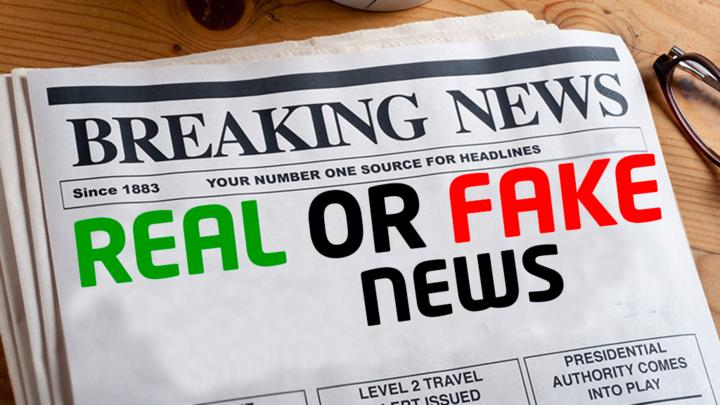

# BRIEF DESCRIPTION OF DATASET
**This dataset consists of about 40000 articles consisting of fake as well as real news. Our aim is train our model so that it can correctly predict whether a given piece of news is real or fake.The fake and real news data is given in two separate datasets with each dataset consisting around 20000 articles each.**

### LOADING THE NECESSARY LIBRARIES

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from sklearn.preprocessing import LabelBinarizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from bs4 import BeautifulSoup
import re,string,unicodedata
from keras.preprocessing import text, sequence
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split
from string import punctuation
from nltk import pos_tag
from nltk.corpus import wordnet
import keras
from keras.models import Sequential
from keras.layers import Dense,Embedding,LSTM,Dropout
from keras.callbacks import ReduceLROnPlateau 
import tensorflow as tf


NotFoundError: dlopen(/Users/nyagaderrick/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/tensorflow-plugins/libmetal_plugin.dylib, 0x0006): symbol not found in flat namespace '__ZN10tensorflow8internal10LogMessage16VmoduleActivatedEPKci'

In [ ]:
true = pd.read_csv('data/Fake and real news dataset/True.csv')
false = pd.read_csv('data/Fake and real news dataset/Fake.csv')

##### DATA VISUALIZATION AND PREPROCESSING

In [ ]:
true.head()

title  \
0  As U.S. budget fight looms, Republicans flip t...   
1  U.S. military to accept transgender recruits o...   
2  Senior U.S. Republican senator: 'Let Mr. Muell...   
3  FBI Russia probe helped by Australian diplomat...   
4  Trump wants Postal Service to charge 'much mor...   

                                                text       subject  \
0  WASHINGTON (Reuters) - The head of a conservat...  politicsNews   
1  WASHINGTON (Reuters) - Transgender people will...  politicsNews   
2  WASHINGTON (Reuters) - The special counsel inv...  politicsNews   
3  WASHINGTON (Reuters) - Trump campaign adviser ...  politicsNews   
4  SEATTLE/WASHINGTON (Reuters) - President Donal...  politicsNews   

                 date  
0  December 31, 2017   
1  December 29, 2017   
2  December 31, 2017   
3  December 30, 2017   
4  December 29, 2017

In [ ]:
false.head()

title  \
0   Donald Trump Sends Out Embarrassing New Year’...   
1   Drunk Bragging Trump Staffer Started Russian ...   
2   Sheriff David Clarke Becomes An Internet Joke...   
3   Trump Is So Obsessed He Even Has Obama’s Name...   
4   Pope Francis Just Called Out Donald Trump Dur...   

                                                text subject  \
0  Donald Trump just couldn t wish all Americans ...    News   
1  House Intelligence Committee Chairman Devin Nu...    News   
2  On Friday, it was revealed that former Milwauk...    News   
3  On Christmas day, Donald Trump announced that ...    News   
4  Pope Francis used his annual Christmas Day mes...    News   

                date  
0  December 31, 2017  
1  December 31, 2017  
2  December 30, 2017  
3  December 29, 2017  
4  December 25, 2017

In [ ]:
true['category'] = 1
false['category'] = 0

In [ ]:
df = pd.concat([true,false]) #Merging the 2 datasets

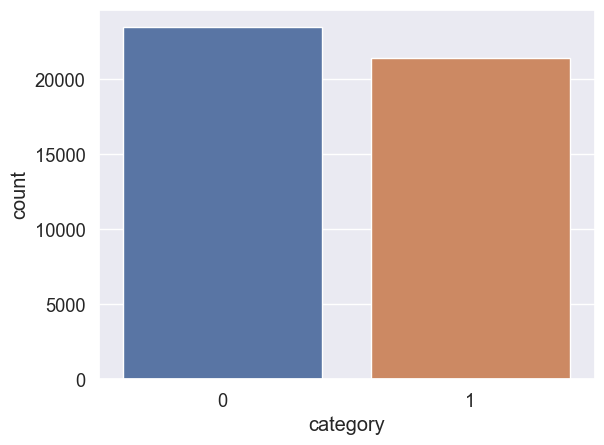

In [ ]:
# Assuming "category" is the correct column name
sns.set_style("darkgrid")
sns.countplot(data=df, x="category")
plt.show()

**SO, WE CAN SEE THAT THE DATASET IS BALANCED**

In [ ]:
df.head()

title  \
0  As U.S. budget fight looms, Republicans flip t...   
1  U.S. military to accept transgender recruits o...   
2  Senior U.S. Republican senator: 'Let Mr. Muell...   
3  FBI Russia probe helped by Australian diplomat...   
4  Trump wants Postal Service to charge 'much mor...   

                                                text       subject  \
0  WASHINGTON (Reuters) - The head of a conservat...  politicsNews   
1  WASHINGTON (Reuters) - Transgender people will...  politicsNews   
2  WASHINGTON (Reuters) - The special counsel inv...  politicsNews   
3  WASHINGTON (Reuters) - Trump campaign adviser ...  politicsNews   
4  SEATTLE/WASHINGTON (Reuters) - President Donal...  politicsNews   

                 date  category  
0  December 31, 2017          1  
1  December 29, 2017          1  
2  December 31, 2017          1  
3  December 30, 2017          1  
4  December 29, 2017          1

In [ ]:
df.isna().sum() # Checking for nan Values

title       0
text        0
subject     0
date        0
category    0
dtype: int64

In [ ]:
df.title.count()

44898

In [ ]:
df.subject.value_counts()

politicsNews       11272
worldnews          10145
News                9050
politics            6841
left-news           4459
Government News     1570
US_News              783
Middle-east          778
Name: subject, dtype: int64

**MERGING ALL THE TEXT DATA INTO 1 COLUMN i.e. 'text'**

[Text(0, 0, 'politicsNews'),
 Text(1, 0, 'worldnews'),
 Text(2, 0, 'News'),
 Text(3, 0, 'politics'),
 Text(4, 0, 'Government News'),
 Text(5, 0, 'left-news'),
 Text(6, 0, 'US_News'),
 Text(7, 0, 'Middle-east')]

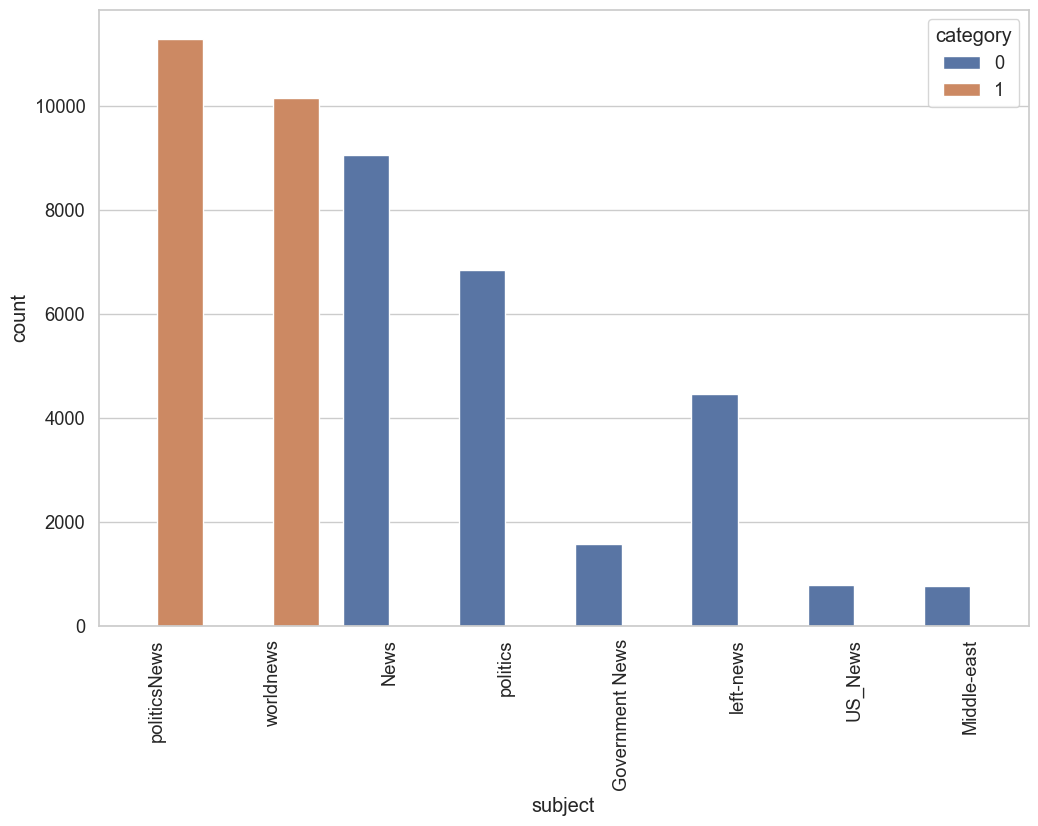

In [ ]:
plt.figure(figsize = (12,8))
sns.set(style = "whitegrid",font_scale = 1.2)
chart = sns.countplot(x = "subject", hue = "category" , data = df)
chart.set_xticklabels(chart.get_xticklabels(),rotation=90)

**SINCE THE TOPICS IN SUBJECT COLUMN ARE DIFFERENT FOR BOTH CATEGORIES, HENCE WE HAVE TO EXCLUDE IT FROM FINAL TEXT COLUMN**

In [ ]:
# Add 'text' and 'title' columns and remove 'title', 'subject', and 'date' columns
df['text'] = df['text'] + " " + df['title']
del df['title']
del df['subject']
del df['date']

# Rename the 'text' column to 'Statement'
df.rename(columns={'text': 'statement'}, inplace=True)

# Rename the 'text' column to 'Statement'
df.rename(columns={'category': 'verdict'}, inplace=True)

# Save the DataFrame to a CSV file
df.to_csv('data/factcheck_data.csv', index=False)

In [ ]:
df.head()


statement  verdict
0  WASHINGTON (Reuters) - The head of a conservat...        1
1  WASHINGTON (Reuters) - Transgender people will...        1
2  WASHINGTON (Reuters) - The special counsel inv...        1
3  WASHINGTON (Reuters) - Trump campaign adviser ...        1
4  SEATTLE/WASHINGTON (Reuters) - President Donal...        1

In [ ]:

# Load the first dataset
df1 = pd.read_csv('data/politifact_factcheck_data.csv')

# Load the second dataset
df2 = pd.read_csv('data/factcheck_data.csv')

# Combine the two datasets
combined_df = pd.concat([df1, df2], ignore_index=True)

# Save the combined dataset to a new CSV file
combined_df.to_csv('combined_data.csv', index=False)


In [ ]:
combined_df.head()

statement  verdict
0  John McCain opposed bankruptcy protections for...        1
1  "Bennie Thompson actively cheer-led riots in t...        0
2  Says Maggie Hassan was "out of state on 30 day...        1
3  "BUSTED: CDC Inflated COVID Numbers, Accused o...        0
4  "I'm the only (Republican) candidate that has ...        1

**WHAT ARE STOPWORDS?**

**Stopwords are the English words which does not add much meaning to a sentence. They can safely be ignored without sacrificing the meaning of the sentence. For example, the words like the, he, have etc. Such words are already captured this in corpus named corpus. We first download it to our python environment.**

**DATA CLEANING**

In [ ]:
 #Define a set of stopwords
stop = set(stopwords.words('english'))

def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

# Define a function to remove text before sentences
def remove_text_before_sentences(text):
    # Use regular expression to match and remove the text before the first sentence
    text = re.sub(r'^[A-Z]+\s*-\s*', '', text)
    
    return text

# Define a function to remove words within parentheses and the parentheses themselves
def remove_words_in_parentheses(text):
    return re.sub(r'\([^)]*\)', '', text)

# Define a function to remove dashes
def remove_dashes(text):
    return text.replace('-', '')

# Define a function to remove unwanted symbols and special characters
def remove_symbols(text):
    # Define a regular expression pattern to match symbols and special characters
    pattern = r'[^A-Za-z0-9\s]'
    return re.sub(pattern, '', text)

# Define a function to denoise the text
def denoise_text(text):
    text = strip_html(text)
    text = remove_text_before_sentences(text)
    text = remove_words_in_parentheses(text)
    text = remove_dashes(text)
    text = remove_symbols(text)
    text = ' '.join([word for word in text.split() if word.lower() not in stop])
    return text

# Apply the denoise_text function to the 'text' column in your DataFrame
combined_df['statement'] = combined_df['statement'].apply(denoise_text)

In [ ]:
combined_df.head(100)

# Save the combined dataset to a new CSV file
combined_df.to_csv('data/combined_cleaned_data.csv', index=False)


In [ ]:
combined_df.head()

statement  verdict
0  John McCain opposed bankruptcy protections fam...        1
1        Bennie Thompson actively cheerled riots 90s        0
2  Says Maggie Hassan state 30 days last three mo...        1
3  BUSTED CDC Inflated COVID Numbers Accused Viol...        0
4      Im candidate actually reduced size government        1

**WORDCLOUD FOR REAL TEXT (LABEL - 1)**

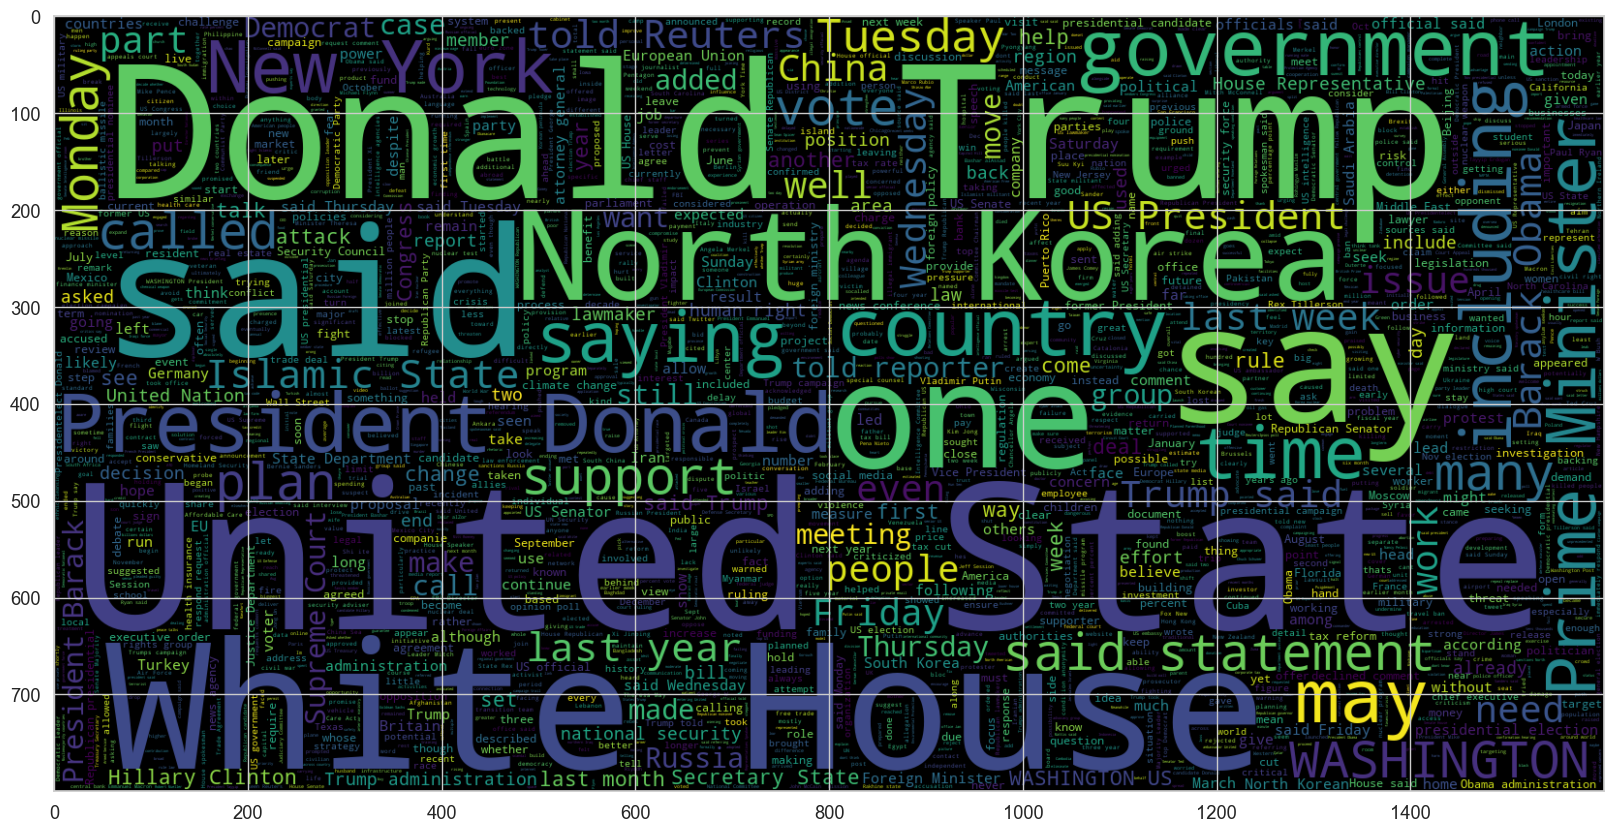

In [ ]:
plt.figure(figsize = (20,20)) # Text that is not Fake
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800 , stopwords = STOPWORDS).generate(" ".join(combined_df[combined_df.verdict == 1].statement))
plt.imshow(wc , interpolation = 'bilinear')

**WORDCLOUD FOR FAKE TEXT (LABEL - 0)**

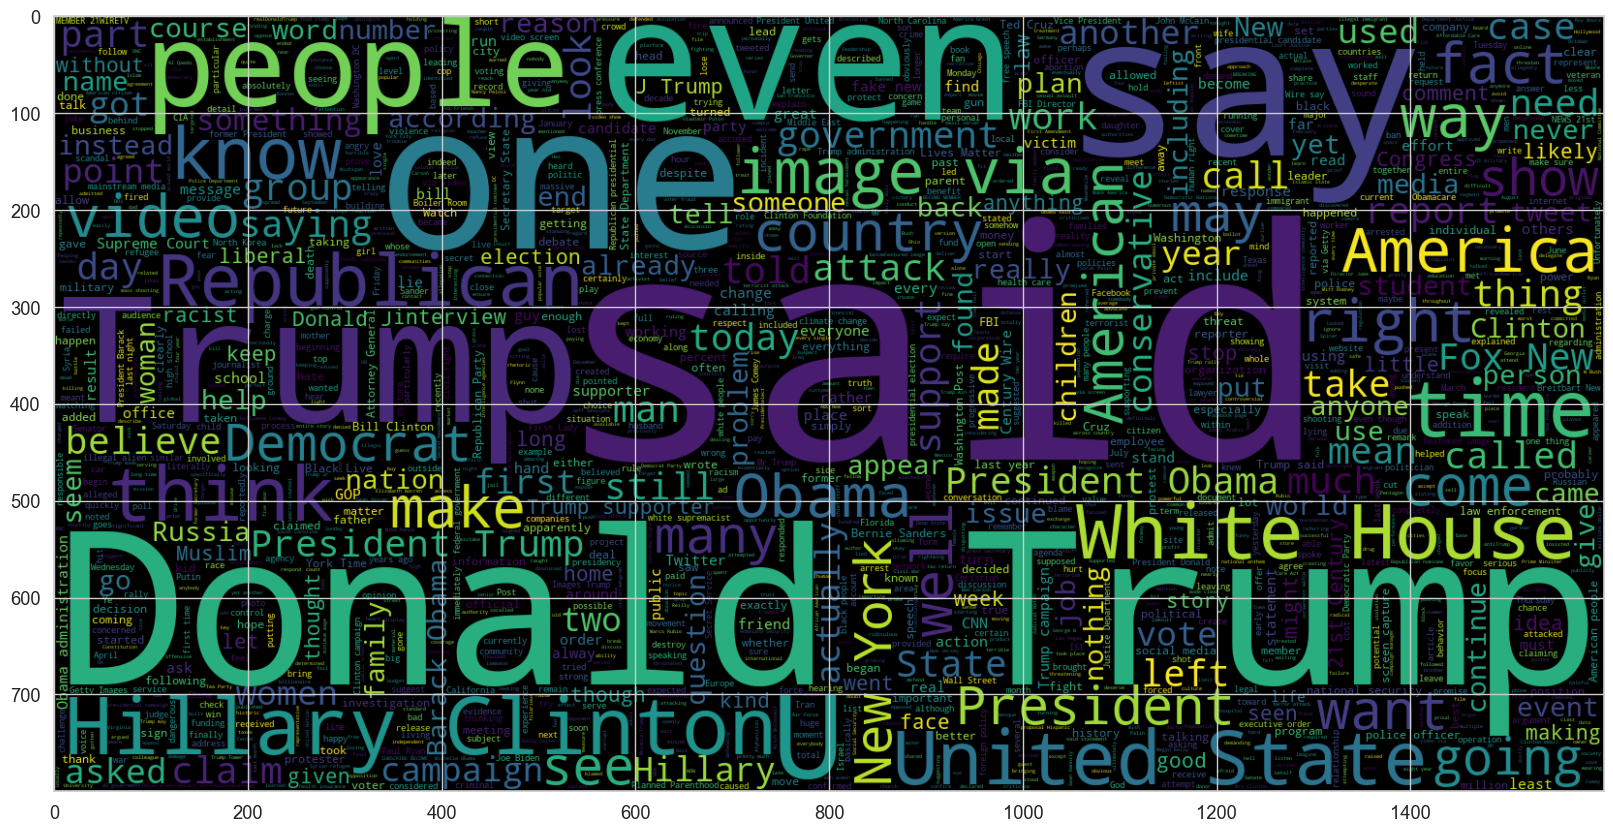

In [ ]:
plt.figure(figsize = (20,20)) # Text that is Fake
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800 , stopwords = STOPWORDS).generate(" ".join(combined_df[combined_df.verdict == 0].statement))
plt.imshow(wc , interpolation = 'bilinear')

**Number of characters in texts**

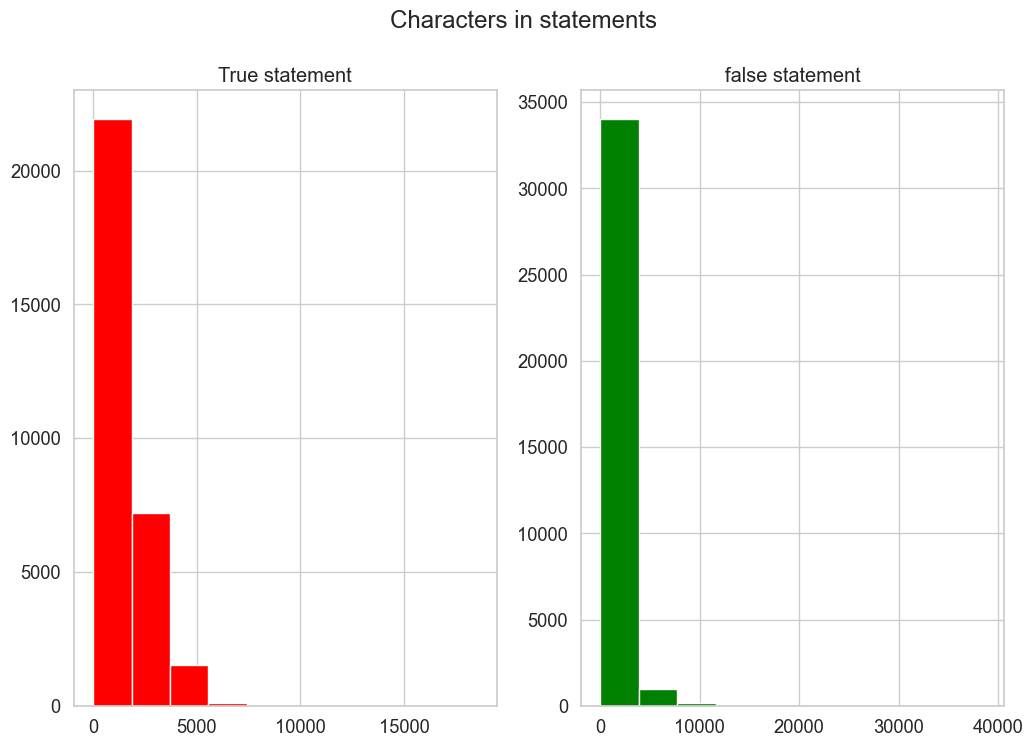

In [ ]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(12,8))
text_len=combined_df[combined_df['verdict']==1]['statement'].str.len()
ax1.hist(text_len,color='red')
ax1.set_title('True statement')
text_len=combined_df[combined_df['verdict']==0]['statement'].str.len()
ax2.hist(text_len,color='green')
ax2.set_title('false statement')
fig.suptitle('Characters in statements')
plt.show()

**The distribution of both seems to be a bit different.Around 23000 characters in true and 34000 in false.**

**Number of words in each text**

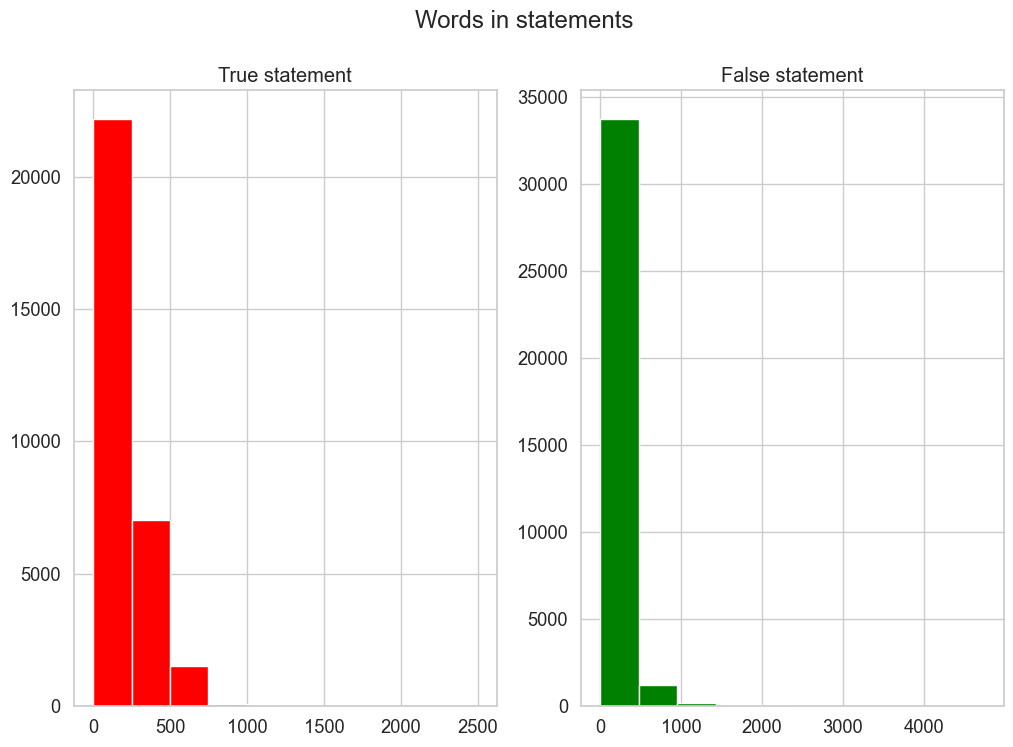

In [ ]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(12,8))
text_len=combined_df[combined_df['verdict']==1]['statement'].str.split().map(lambda x: len(x))
ax1.hist(text_len,color='red')
ax1.set_title('True statement')
text_len=combined_df[combined_df['verdict']==0]['statement'].str.split().map(lambda x: len(x))
ax2.hist(text_len,color='green')
ax2.set_title('False statement')
fig.suptitle('Words in statements')
plt.show()

**Average word length in a text**

/var/folders/tv/lq8c2cb553sbrv2cq02t2fhw0000gn/T/ipykernel_45038/3643970498.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(word.map(lambda x: np.mean(x)),ax=ax1,color='red')
/Users/nyagaderrick/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/nyagaderrick/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/var/folders/tv/lq8c2cb553sbrv2cq02t2fhw0000gn/T/ipykernel_45038/3

Text(0.5, 0.98, 'Average word length in each statement')

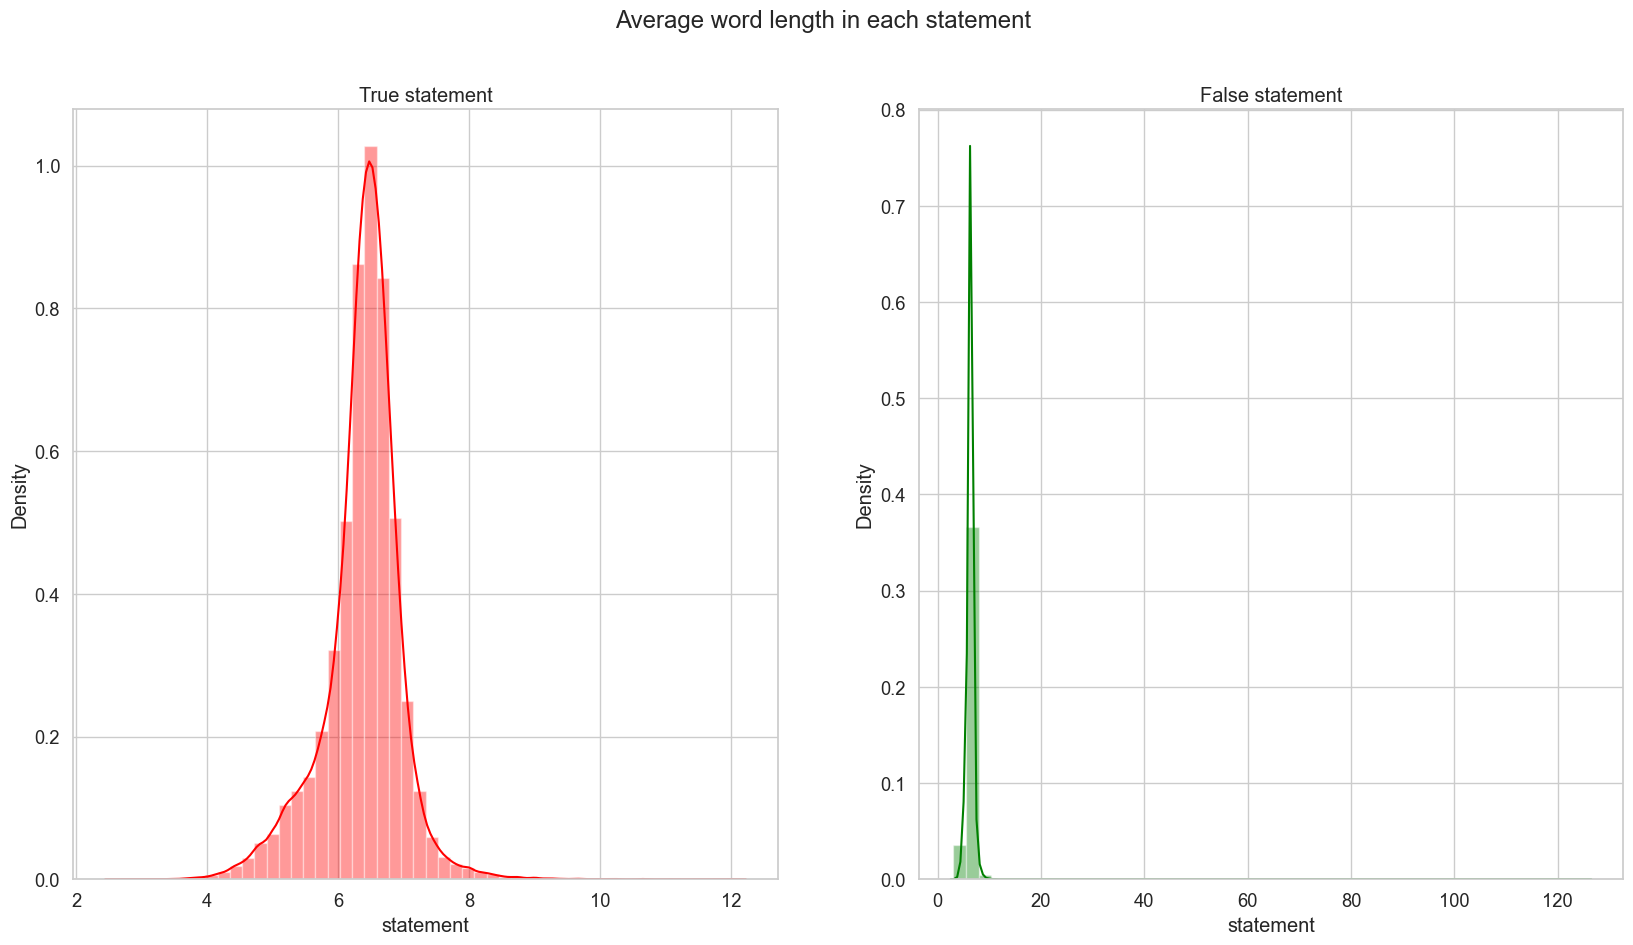

In [ ]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(20,10))
word=combined_df[combined_df['verdict']==1]['statement'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax1,color='red')
ax1.set_title('True statement')
word=combined_df[combined_df['verdict']==0]['statement'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax2,color='green')
ax2.set_title('False statement')
fig.suptitle('Average word length in each statement')

In [ ]:
def get_corpus(statement):
    words = []
    for i in statement:
        for j in i.split():
            words.append(j.strip())
    return words
corpus = get_corpus(combined_df.statement)
corpus[:5]

['John', 'McCain', 'opposed', 'bankruptcy', 'protections']

In [ ]:
from collections import Counter
counter = Counter(corpus)
most_common = counter.most_common(10)
most_common = dict(most_common)
most_common

{'said': 130678,
 'Trump': 126577,
 'US': 59067,
 'would': 55647,
 'people': 40377,
 'President': 35308,
 'one': 31725,
 'also': 30471,
 'Donald': 28705,
 'Obama': 27342}

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
def get_top_text_ngrams(corpus, n, g):
    vec = CountVectorizer(ngram_range=(g, g)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

**Unigram Analysis**

<AxesSubplot: >

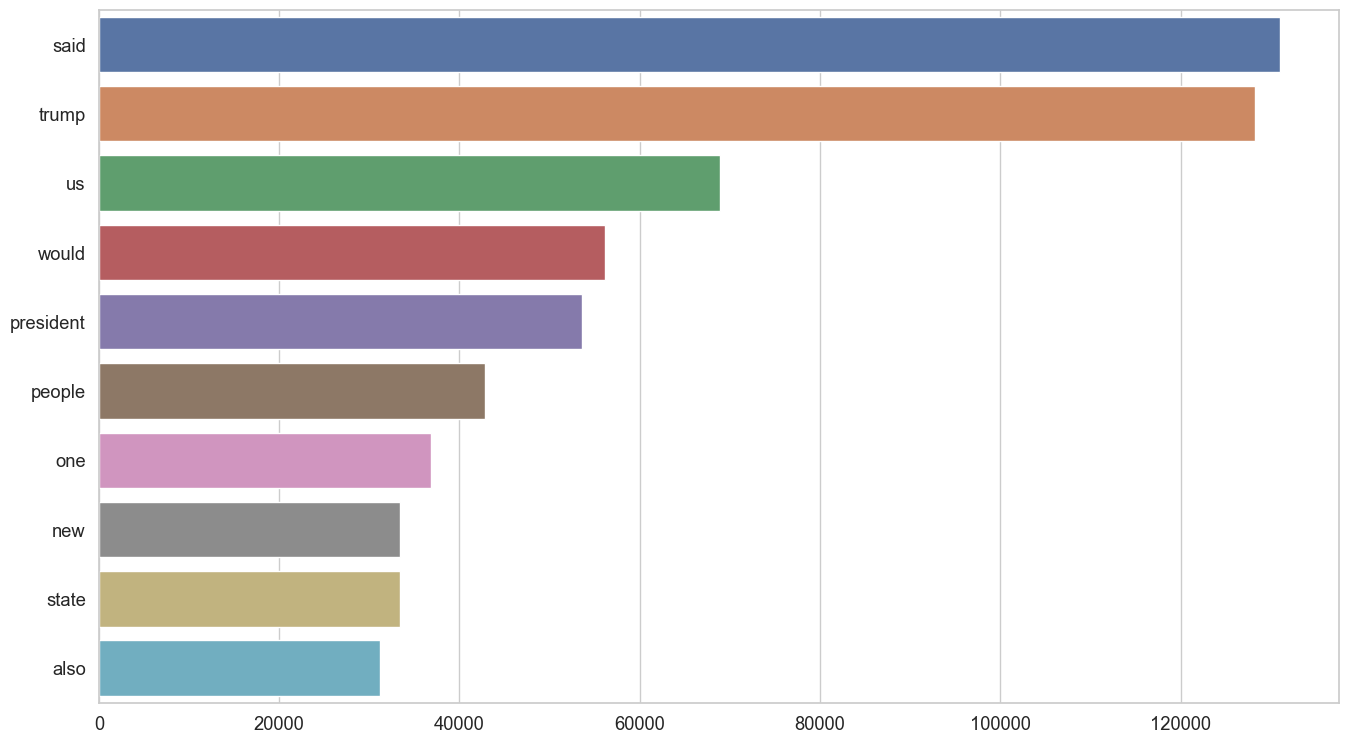

In [ ]:
plt.figure(figsize = (16,9))
most_common_uni = get_top_text_ngrams(combined_df.statement,10,1)
most_common_uni = dict(most_common_uni)
sns.barplot(x=list(most_common_uni.values()),y=list(most_common_uni.keys()))

**Bigram Analysis**

<AxesSubplot: >

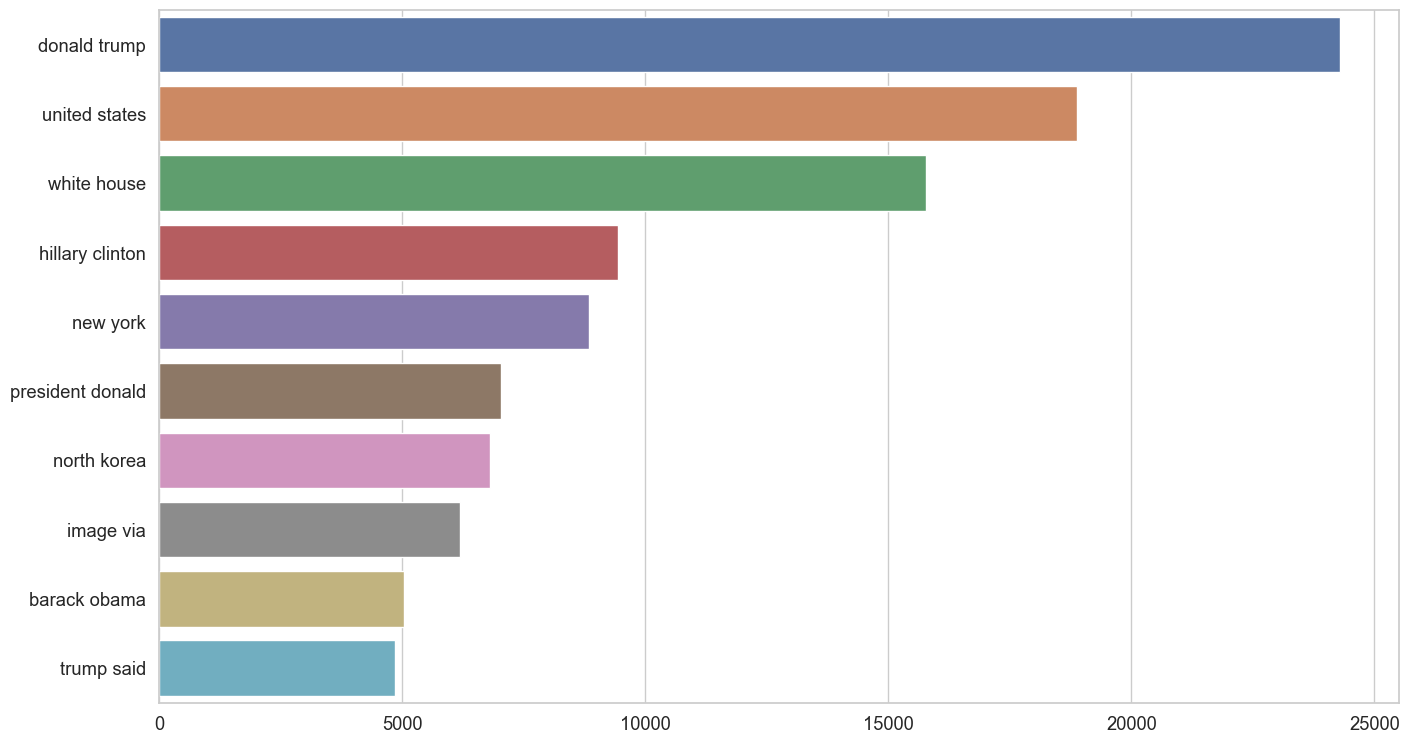

In [ ]:
plt.figure(figsize = (16,9))
most_common_bi = get_top_text_ngrams(combined_df.statement,10,2)
most_common_bi = dict(most_common_bi)
sns.barplot(x=list(most_common_bi.values()),y=list(most_common_bi.keys()))

**Trigram Analysis**

<AxesSubplot: >

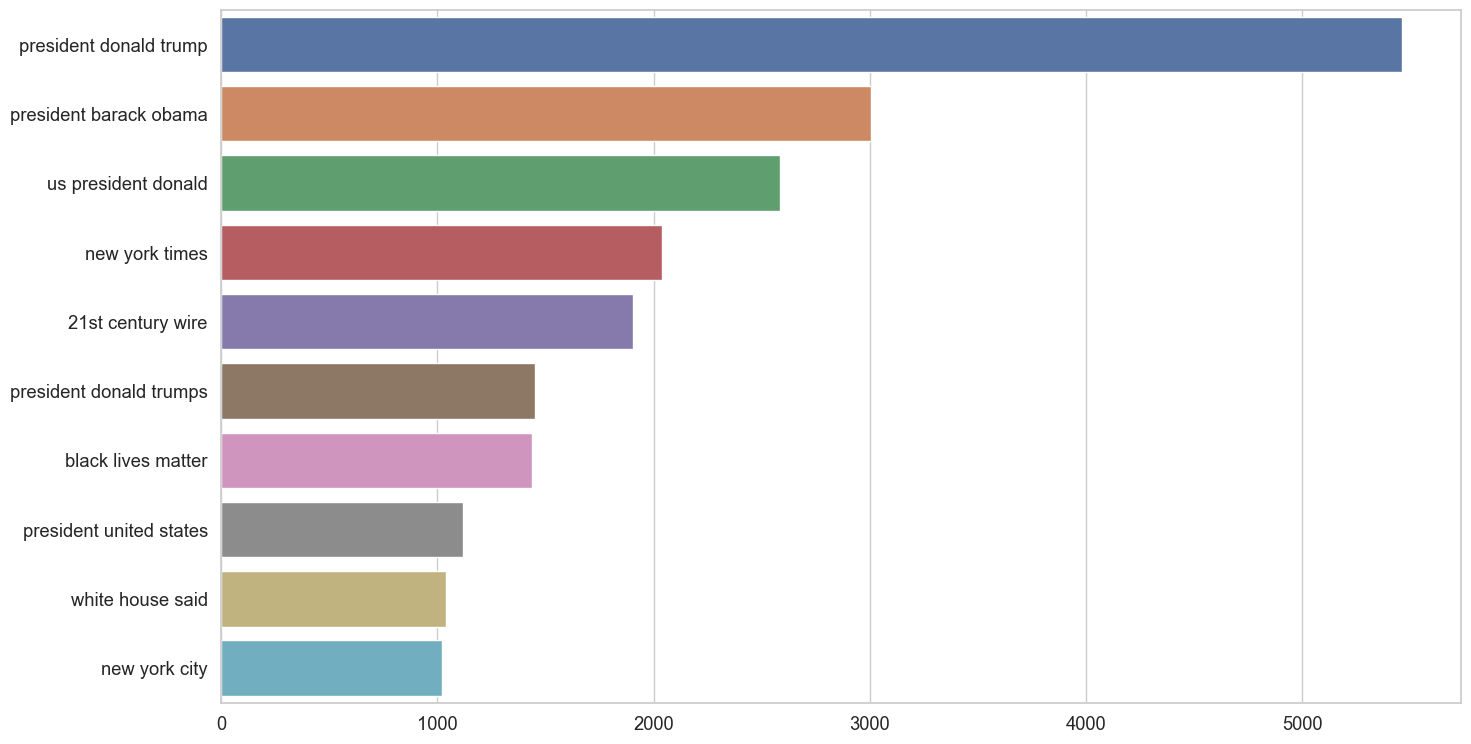

In [ ]:
plt.figure(figsize = (16,9))
most_common_tri = get_top_text_ngrams(combined_df.statement,10,3)
most_common_tri = dict(most_common_tri)
sns.barplot(x=list(most_common_tri.values()),y=list(most_common_tri.keys()))

**Splitting the data into 2 parts - training and testing data**

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(combined_df.statement,combined_df.verdict,random_state = 0)

In [ ]:
max_features = 20000
maxlen = 3000

constant_value = 0  # The constant value for padding (e.g., zeros)

**Tokenizing Text -> Repsesenting each word by a number**

**Mapping of orginal word to number is preserved in word_index property of tokenizer**

**Tokenized applies basic processing like changing it to lower case, explicitely setting that as False**

**Lets keep all news to 300, add padding to news with less than 300 words and truncating long ones**

In [ ]:
x_train = np.zeros((len(tokenized_train), maxlen), dtype=np.int32)

for i, seq in enumerate(tokenized_train):
    if len(seq) > maxlen:
        x_train[i, :] = seq[:maxlen]  # Truncate if longer than maxlen
    else:
        pad_width = maxlen - len(seq)
        x_train[i, :] = np.pad(seq, (0, pad_width), 'constant', constant_values=constant_value)

In [ ]:
# Manually pad sequences with the same constant value (zeros) using NumPy for testing data
x_test = np.zeros((len(tokenized_test), maxlen), dtype=np.int32)

for i, seq in enumerate(tokenized_test):
    if len(seq) > maxlen:
        x_test[i, :] = seq[:maxlen]  # Truncate if longer than maxlen
    else:
        pad_width = maxlen - len(seq)
        x_test[i, :] = np.pad(seq, (0, pad_width), 'constant', constant_values=constant_value)

# Introduction to GloVe
**GloVe method is built on an important idea,
You can derive semantic relationships between words from the co-occurrence matrix.
Given a corpus having V words, the co-occurrence matrix X will be a V x V matrix, where the i th row and j th column of X, X_ij denotes how many times word i has co-occurred with word j. An example co-occurrence matrix might look as follows.**
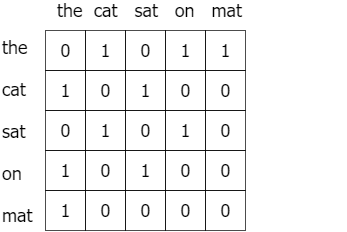

**The co-occurrence matrix for the sentence “the cat sat on the mat” with a window size of 1. As you probably noticed it is a symmetric matrix.
How do we get a metric that measures semantic similarity between words from this? For that, you will need three words at a time. Let me concretely lay down this statement.**

**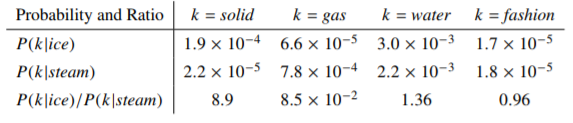
The behavior of P_ik/P_jk for various words
Consider the entity
P_ik/P_jk where P_ik = X_ik/X_i
Here P_ik denotes the probability of seeing word i and k together, which is computed by dividing the number of times i and k appeared together (X_ik) by the total number of times word i appeared in the corpus (X_i).
You can see that given two words, i.e. ice and steam, if the third word k (also called the “probe word”),
is very similar to ice but irrelevant to steam (e.g. k=solid), P_ik/P_jk will be very high (>1),
is very similar to steam but irrelevant to ice (e.g. k=gas), P_ik/P_jk will be very small (<1),
is related or unrelated to either words, then P_ik/P_jk will be close to 1
So, if we can find a way to incorporate P_ik/P_jk to computing word vectors we will be achieving the goal of using global statistics when learning word vectors.**

**Source Credits - https://towardsdatascience.com/light-on-math-ml-intuitive-guide-to-understanding-glove-embeddings-b13b4f19c010**

In [ ]:
EMBEDDING_FILE = 'data/glove.twitter.27B.100d.txt'

In [ ]:
def get_coefs(word, *arr): 
    return word, np.asarray(arr, dtype='float32')
embeddings_index = dict(get_coefs(*o.rstrip().rsplit(' ')) for o in open(EMBEDDING_FILE))

In [ ]:
all_embs = np.stack(embeddings_index.values())
emb_mean,emb_std = all_embs.mean(), all_embs.std()
embed_size = all_embs.shape[1]

word_index = tokenizer.word_index
nb_words = min(max_features, len(word_index))
#change below line if computing normal stats is too slow
embedding_matrix = embedding_matrix = np.random.normal(emb_mean, emb_std, (nb_words, embed_size))
for word, i in word_index.items():
    if i >= max_features: continue
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None: embedding_matrix[i] = embedding_vector

**Some Model Parameters**

In [ ]:
batch_size = 512
epochs = 10
embed_size = 100

In [ ]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience = 2, verbose=1,factor=0.5, min_lr=0.00001)

NameError: name 'ReduceLROnPlateau' is not defined

# TRAINING THE MODEL

In [ ]:
#Defining Neural Network
model = Sequential()
#Non-trainable embeddidng layer
model.add(Embedding(max_features, output_dim=embed_size, weights=[embedding_matrix], input_length=maxlen, trainable=False))
#LSTM 
model.add(LSTM(units=128 , return_sequences = True , recurrent_dropout = 0.25 , dropout = 0.25))
model.add(LSTM(units=64 , recurrent_dropout = 0.1 , dropout = 0.1))
model.add(Dense(units = 32 , activation = 'relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer=keras.optimizers.Adam(lr = 0.01), loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 3000, 100)         2000000   
                                                                 
 lstm_4 (LSTM)               (None, 3000, 128)         117248    
                                                                 
 lstm_5 (LSTM)               (None, 64)                49408     
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2,168,769
Trainable params: 168,769
Non-trainable params: 2,000,000
_________________________________________________________________


In [ ]:
history = model.fit(x_train, y_train, batch_size = batch_size , validation_data = (x_test,y_test) , epochs = epochs , callbacks = [learning_rate_reduction])

# ANALYSIS AFTER TRAINING OF MODEL

In [ ]:
print("Accuracy of the model on Training Data is - " , model.evaluate(x_train,y_train)[1]*100 , "%")
print("Accuracy of the model on Testing Data is - " , model.evaluate(X_test,y_test)[1]*100 , "%")

33673/33673 [==============================] - 108s 3ms/step
Accuracy of the model on Training Data is -  99.99703168869019 %
11225/11225 [==============================] - 36s 3ms/step
Accuracy of the model on Testing Data is -  99.86637234687805 %


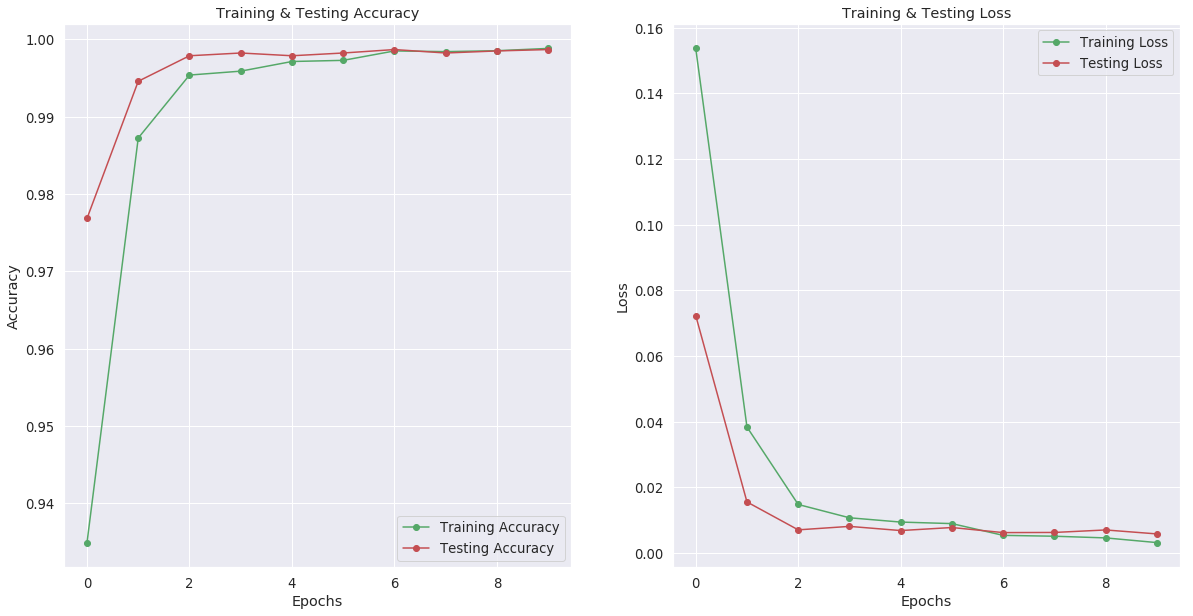

In [ ]:
epochs = [i for i in range(10)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
fig.set_size_inches(20,10)

ax[0].plot(epochs , train_acc , 'go-' , label = 'Training Accuracy')
ax[0].plot(epochs , val_acc , 'ro-' , label = 'Testing Accuracy')
ax[0].set_title('Training & Testing Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs , train_loss , 'go-' , label = 'Training Loss')
ax[1].plot(epochs , val_loss , 'ro-' , label = 'Testing Loss')
ax[1].set_title('Training & Testing Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Loss")
plt.show()

In [ ]:
pred = model.predict_classes(X_test)
pred[:5]

array([[0],
       [0],
       [0],
       [0],
       [1]], dtype=int32)

In [ ]:
print(classification_report(y_test, pred, target_names = ['Fake','Not Fake']))

              precision    recall  f1-score   support

        Fake       1.00      1.00      1.00      5858
    Not Fake       1.00      1.00      1.00      5367

    accuracy                           1.00     11225
   macro avg       1.00      1.00      1.00     11225
weighted avg       1.00      1.00      1.00     11225



In [ ]:
cm = confusion_matrix(y_test,pred)
cm

array([[5850,    8],
       [   7, 5360]])

In [ ]:
cm = pd.DataFrame(cm , index = ['Fake','Original'] , columns = ['Fake','Original'])

Text(62.5, 0.5, 'Actual')

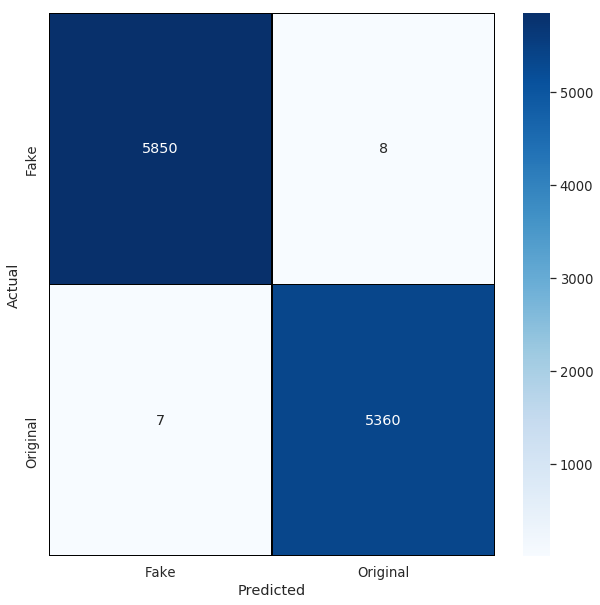

In [ ]:
plt.figure(figsize = (10,10))
sns.heatmap(cm,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt='' , xticklabels = ['Fake','Original'] , yticklabels = ['Fake','Original'])
plt.xlabel("Predicted")
plt.ylabel("Actual")

**PLS UPVOTE THIS NOTEBOOK IF YOU LIKE IT! THANKS FOR YOUR TIME !**